In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection, tree
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt

import random
import torch
from torch import nn, optim
import math
from IPython import display
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# FOR linking to Google Colab to my google drive 
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# cd /content/drive/MyDrive/Spring 2023/Classes/Spring 2023 - Junior Year/ML/HWS/HW4

/content/drive/Othercomputers/My MacBook Pro/Spring 2023 - Junior Year/ML/HWS/HW4


In [ ]:
# Load dataset into pandas DataFrame
# df = pd.read_csv("/content/drive/MyDrive/Spring 2023/Classes/Spring 2023 - Junior Year/ML/HWS/HW4/diabetes - Copy.csv") 
df = pd.read_csv("diabetes - Copy.csv") 

In [ ]:
# Given file in Lab to plot data and model outputs 
# plot_lib -> file to be uploaded with submission 
from plot_lib import plot_data, plot_model, set_default

# Overview of the data 

In [ ]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

In [ ]:
# view dimensions of dataset
print("Shape of data", df.shape) 

# view summary of dataset
df.info()

In [ ]:
# let's preview the dataset
df
df.head()

In [ ]:
# view the column names of the dataframe
col_names = df.columns
col_names

## Check whether our data is balanced or unbalanced

In [ ]:
# The number of data points.
N = len(df)
print('N = {:d} data points'.format(N))

# check distribution of target_class column
df['Diabetes'].value_counts()

# view the percentage distribution of target_class column
df['Diabetes'].value_counts()/float(len(df))

N = 253680 data points


0    0.860667
1    0.139333
Name: Diabetes, dtype: float64

Text(0.5, 1.0, 'Diabetes Dataset: Class Counts')

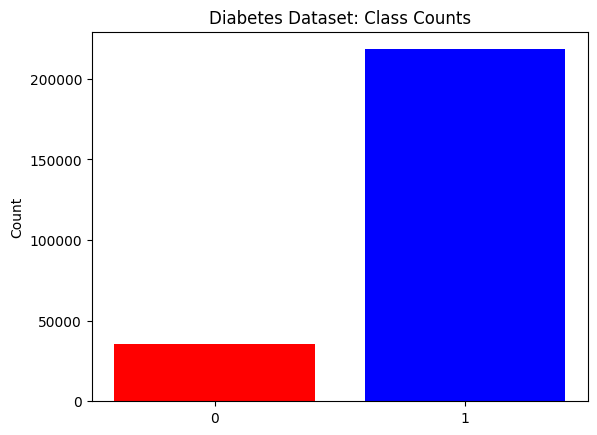

In [ ]:
# Give a barplot of each class.
plt.figure()
classes = df['Diabetes'].unique()
plt.bar([0,1], df['Diabetes'].value_counts(ascending=True), color=['r', 'b'], tick_label=classes)
plt.ylabel('Count')
plt.title('Diabetes Dataset: Class Counts')

In [ ]:
import seaborn as sns # for statistical data visualization

fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

### Checking for missing values

In [ ]:
# check for missing values in variables
df.isnull().sum()

Diabetes                 0
HighBP                   0
HighChol                 0
BMI                      0
Smoker                   0
Stroke                   0
Myocardial               0
PhysActivity             0
Fruit                    0
Vegetables               0
HeavyDrinker             0
HasHealthcare            0
NotAbleToAffordDoctor    0
GeneralHealth            0
MentalHealth             0
PhysicalHealth           0
HardToClimbStairs        0
BiologicalSex            0
AgeBracket               0
EducationBracket         0
IncomeBracket            0
Zodiac                   0
dtype: int64

We can see that there are no missing values in the dataset.

In [ ]:
# view summary statistics in numerical variables
round(df.describe(),2)

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,...,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.14,0.43,0.42,28.38,0.44,0.04,0.09,0.76,0.63,0.81,...,0.08,2.51,3.18,4.24,0.17,1.44,8.03,5.05,6.05,6.50
std,0.35,0.49,0.49,6.61,0.50,0.20,0.29,0.43,0.48,0.39,...,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07,3.45
min,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,24.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,2.00,0.00,0.00,0.00,1.00,6.00,4.00,5.00,4.00
50%,0.00,0.00,0.00,27.00,0.00,0.00,0.00,1.00,1.00,1.00,...,0.00,2.00,0.00,0.00,0.00,1.00,8.00,5.00,7.00,7.00
75%,0.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.00,3.00,2.00,3.00,0.00,2.00,10.00,6.00,8.00,10.00
max,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,5.00,30.00,30.00,1.00,2.00,13.00,6.00,8.00,12.00


# Defining X (features) and y (target)
Split dataset into features and target variable

In [ ]:
# Defining X and y 
Y = df['Diabetes']
print(Y.shape)
X = df.drop(columns=['Diabetes']) 
print(X.shape)

(253680,)
(253680, 21)


### Detect multicollinearity in a dataset

In Python, there are several ways to detect multicollinearity in a dataset, such as using the Variance Inflation Factor (VIF) or calculating the correlation matrix of the independent variables. To address multicollinearity, techniques such as regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other. In this article, we will focus on the most common one – VIF (Variance Inflation Factors).

In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [ ]:
vif_score(X)

,FEATURE,VIF_SCORE
0,HighBP,1.326735
1,HighChol,1.170802
2,BMI,1.139341
3,Smoker,1.091448
4,Stroke,1.081062
5,Myocardial,1.171762
6,PhysActivity,1.156893
7,Fruit,1.112226
8,Vegetables,1.112384
9,HeavyDrinker,1.023777


Summary of numerical variables
All the variables in the data set are numerical
There is a mix of categorical variables and binary variables.
The target class is binary.
There are no missing values in the dataset.

# Preprocessing 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

Converting data to PyTorch tensors

In [ ]:
# Define a list of random seeds to try
seeds = [0, 10, 42, 144]

# Define a list of test set sizes to try
test_sizes = [0.1, 0.2, 0.3]

# Loop over the random seeds and test set sizes
for seed in seeds:
    for test_size in test_sizes:
        
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
        
        # # Split into training and testing sets
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=144)

        # Convert the data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
        X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


# Part 1: Perceptron to classify diabetes from the rest of the dataset

In [ ]:
### Perceptrons using Sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
clf = Perceptron(tol=1e-3, random_state=0, class_weight = 'balanced')

# This is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
clf.fit(X_train_tensor,y_train_tensor)

Perceptron(class_weight='balanced')

In [ ]:
clf.score(X_test, y_test)

0.6627772521812257

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the hyperparameters to tune
param_grid = {'alpha': [0.0001, 0.001, 0.01],
              'max_iter': [1000, 5000, 10000]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their score
print("Best hyperparameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

# Make predictions on the test set using the best model
best_perceptron = grid_search.best_estimator_
y_pred = best_perceptron.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)

print("AUC score:", auc)



Best hyperparameters: {'alpha': 0.0001, 'max_iter': 1000}
Best AUC score: 0.8012094572402034
AUC score: 0.724382300098531


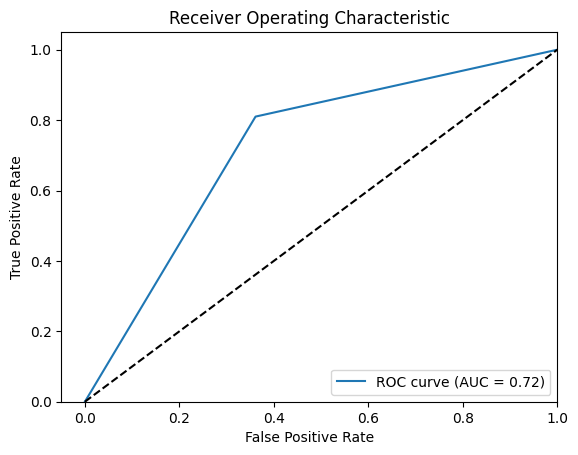

In [ ]:
# Make predictions on the test set using the best model
# best_perceptron = grid_search.best_estimator_
# y_scores = best_perceptron.decision_function(X_test)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Part 2 - Feedforward neural network with at least one hidden layer
This is a Classification task. 

### No activation function 

Epoch [10/100], Loss: 0.4248
Epoch [20/100], Loss: 0.4008
Epoch [30/100], Loss: 0.3879
Epoch [40/100], Loss: 0.3720
Epoch [50/100], Loss: 0.3582
Epoch [60/100], Loss: 0.3507
Epoch [70/100], Loss: 0.3440
Epoch [80/100], Loss: 0.3385
Epoch [90/100], Loss: 0.3338
Epoch [100/100], Loss: 0.3303


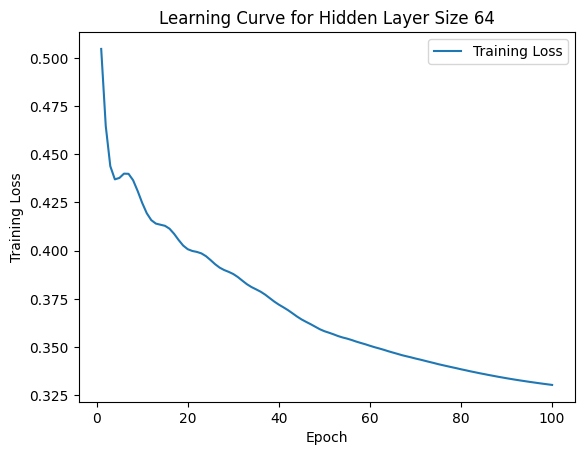

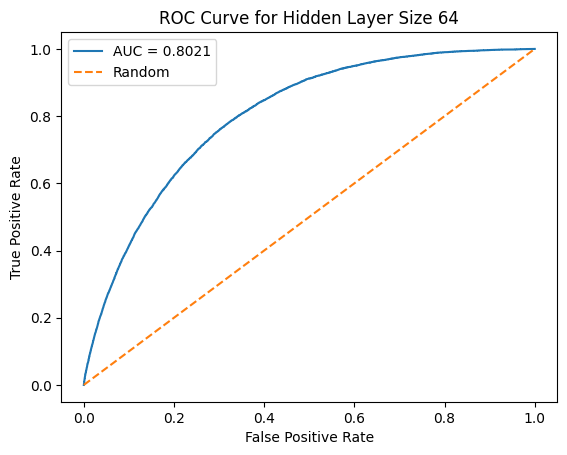

Hidden Layer Size: 64, Accuracy: 0.8626, AUC: 0.8021
Epoch [10/100], Loss: 0.4533
Epoch [20/100], Loss: 0.4399
Epoch [30/100], Loss: 0.4161
Epoch [40/100], Loss: 0.4049
Epoch [50/100], Loss: 0.3913
Epoch [60/100], Loss: 0.3772
Epoch [70/100], Loss: 0.3657
Epoch [80/100], Loss: 0.3579
Epoch [90/100], Loss: 0.3520
Epoch [100/100], Loss: 0.3475


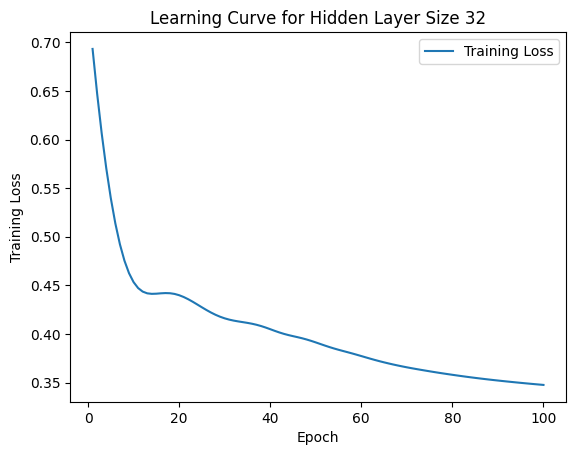

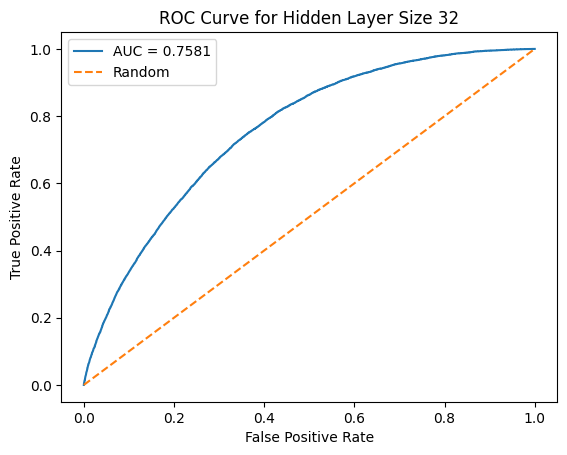

Hidden Layer Size: 32, Accuracy: 0.8606, AUC: 0.7581


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the hyperparameters
input_size = X_train.shape[1]
hidden_sizes = [64, 32] # example of hidden layer sizes - 10 - 20 ....
output_size = 2 # assuming binary classification (diabetes, non-diabetes)

# Training loop for different hyperparameter settings
for hidden_size in hidden_sizes:
    # Create the neural network model
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size)
    )

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    num_epochs = 100
    train_losses = []
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the training loss for the current epoch
        train_losses.append(loss.item())

        # Print the loss for monitoring
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Plot the learning curve
    plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
    plt.title(f'Learning Curve for Hidden Layer Size {hidden_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend()
    plt.show()

    # Evaluate the model on the test set
    with torch.no_grad():
        model.eval()
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = accuracy_score(y_test, predicted.numpy())

        # finding AUC score
        logits = outputs[:, 1] # use the logit scores for the positive class
        probs = torch.sigmoid(logits)
        fpr, tpr, _ = roc_curve(y_test, probs.numpy())
        auc_score = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
        plt.title(f'ROC Curve for Hidden Layer Size {hidden_size}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

        print(f'Hidden Layer Size: {hidden_size}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}')


### **Testing for different hidden layers and Activation function**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


# Define the neural network model
class DiabetesClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation_func):
        super(DiabetesClassifier, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.layers.append(activation_func())
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            self.layers.append(activation_func())
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

Epoch [10/100], Loss: 0.4852
Epoch [20/100], Loss: 0.5088
Epoch [30/100], Loss: 0.4774
Epoch [40/100], Loss: 0.3954
Epoch [50/100], Loss: 0.3971
Epoch [60/100], Loss: 0.3803
Epoch [70/100], Loss: 0.3757
Epoch [80/100], Loss: 0.3716
Epoch [90/100], Loss: 0.3677
Epoch [100/100], Loss: 0.3642


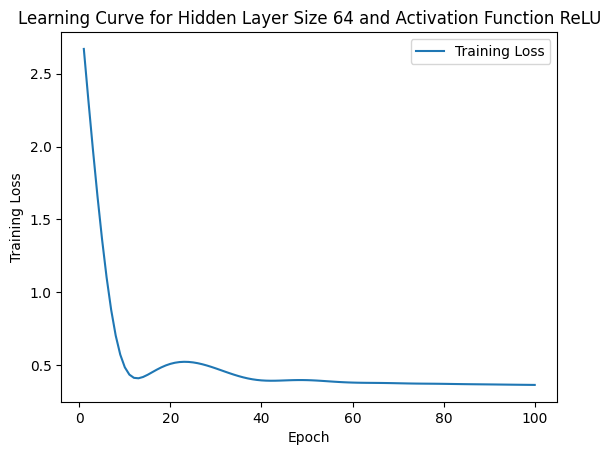

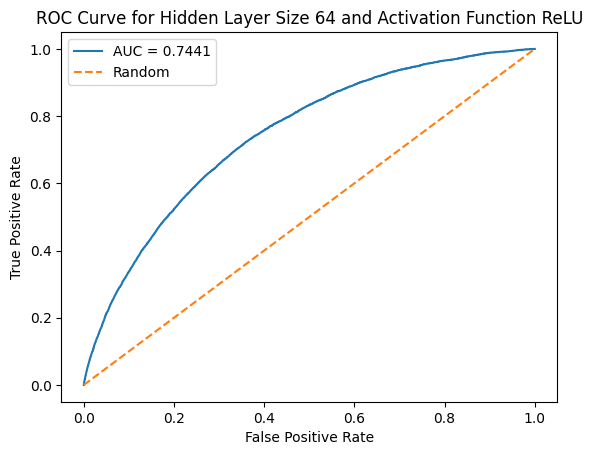

Hidden Layer Size: 64, Activation Function: ReLU, Accuracy: 0.8596, AUC: 0.7441
Epoch [10/100], Loss: 0.4251
Epoch [20/100], Loss: 0.3979
Epoch [30/100], Loss: 0.3972
Epoch [40/100], Loss: 0.3903
Epoch [50/100], Loss: 0.3841
Epoch [60/100], Loss: 0.3790
Epoch [70/100], Loss: 0.3747
Epoch [80/100], Loss: 0.3706
Epoch [90/100], Loss: 0.3663
Epoch [100/100], Loss: 0.3618


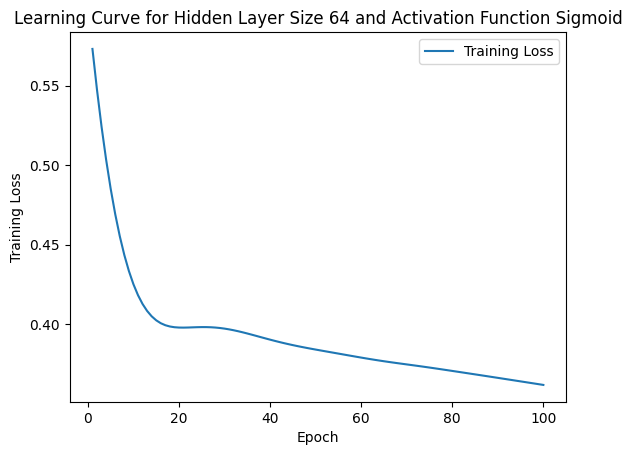

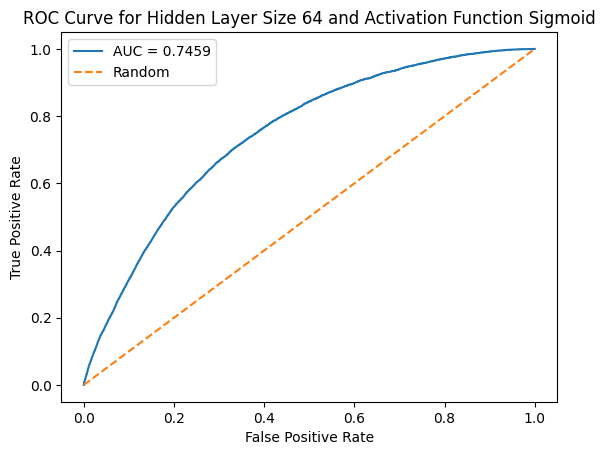

Hidden Layer Size: 64, Activation Function: Sigmoid, Accuracy: 0.8597, AUC: 0.7459
Epoch [10/100], Loss: 0.7156
Epoch [20/100], Loss: 0.4468
Epoch [30/100], Loss: 0.4633
Epoch [40/100], Loss: 0.4327
Epoch [50/100], Loss: 0.4081
Epoch [60/100], Loss: 0.4038
Epoch [70/100], Loss: 0.3980
Epoch [80/100], Loss: 0.3931
Epoch [90/100], Loss: 0.3889
Epoch [100/100], Loss: 0.3844


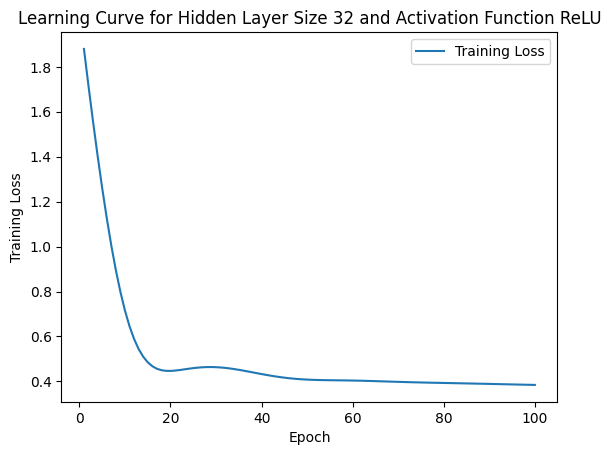

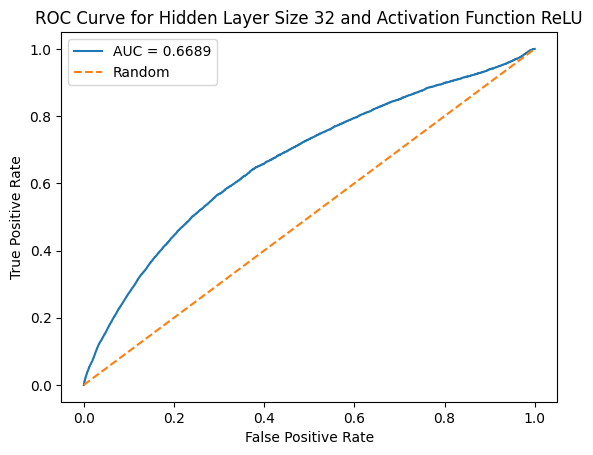

Hidden Layer Size: 32, Activation Function: ReLU, Accuracy: 0.8591, AUC: 0.6689
Epoch [10/100], Loss: 0.4134
Epoch [20/100], Loss: 0.4019
Epoch [30/100], Loss: 0.3971
Epoch [40/100], Loss: 0.3916
Epoch [50/100], Loss: 0.3868
Epoch [60/100], Loss: 0.3815
Epoch [70/100], Loss: 0.3764
Epoch [80/100], Loss: 0.3715
Epoch [90/100], Loss: 0.3667
Epoch [100/100], Loss: 0.3619


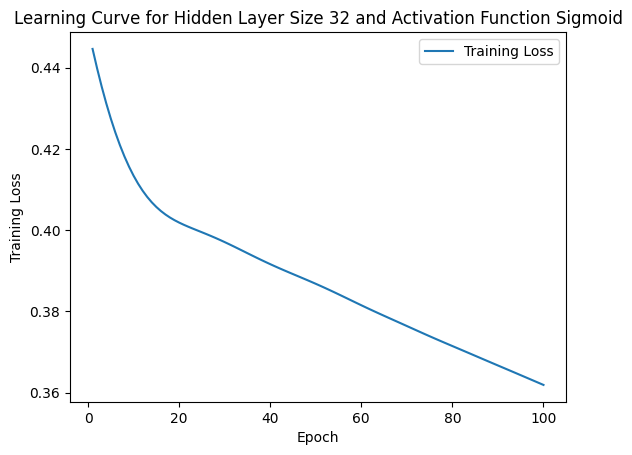

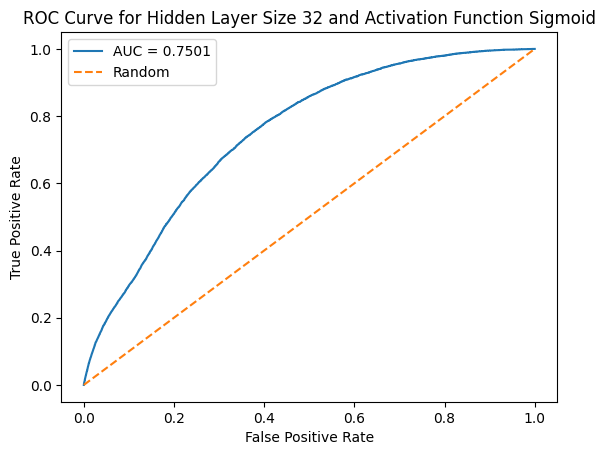

Hidden Layer Size: 32, Activation Function: Sigmoid, Accuracy: 0.8597, AUC: 0.7501


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the hyperparameters
input_size = X_train.shape[1]
hidden_sizes = [64, 32] # example of hidden layer sizes - 10 - 20 ....
# here i am doing 2 hidden size with the valus being the number of nodes per hidden layers 

output_size = 2 # assuming binary classification (diabetes, non-diabetes)
activation_funcs = [nn.ReLU, nn.Sigmoid] # example of activation functions

# Training loop for different hyperparameter settings
# TRYING FOR Different hidden layers and activation functions
for hidden_size in hidden_sizes:
    for activation_func in activation_funcs:
        # Create the neural network model
        model = DiabetesClassifier(input_size, [hidden_size], output_size, activation_func)

        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        num_epochs = 100
        train_losses = []
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Store the training loss for the current epoch
            train_losses.append(loss.item())

            # Print the loss for monitoring
            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

        # Plot the learning curve
        plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
        plt.title(f'Learning Curve for Hidden Layer Size {hidden_size} and Activation Function {activation_func.__name__}')
        plt.xlabel('Epoch')
        plt.ylabel('Training Loss')
        plt.legend()
        plt.show()

        # Evaluate the model on the test set
        with torch.no_grad():
            model.eval()
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs.data, 1)
            accuracy = accuracy_score(y_test, predicted.numpy())

            # finding AUC score
            logits = outputs[:, 1] # use the logit scores for the positive class
            probs = torch.sigmoid(logits)
            fpr, tpr, _ = roc_curve(y_test, probs.numpy())
            auc_score = auc(fpr, tpr)

            # Plot the ROC curve
            plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
            plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
            plt.title(f'ROC Curve for Hidden Layer Size {hidden_size} and Activation Function {activation_func.__name__}')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()

            print(f'Hidden Layer Size: {hidden_size}, Activation Function: {activation_func.__name__}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}')


# Part 3 - “Deep” network (at least 2 hidden layers) to classify diabetes from the rest of the dataset.
This is a regression task. 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
# Define the deep neural network model with 2 hidden layers
class DeepDiabetesClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation_func):
        super(DeepDiabetesClassifier, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes)-1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
        self.activation_func = activation_func()

    def forward(self, x):
        x = self.activation_func(self.input_layer(x))
        for hidden_layer in self.hidden_layers:
            x = self.activation_func(hidden_layer(x))
        x = self.output_layer(x)
        return x

In [ ]:

# Define the hyperparameters
input_size = X_train_tensor.shape[1]
hidden_sizes = [64, 32] # hidden layer sizes for a deep network with 2 hidden layers
output_size = 2 # assuming binary classification (diabetes, non-diabetes)
activation_func = nn.ReLU # example of activation function for hidden layers

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, torch.tensor(y_test_tensor, dtype=torch.long))

# Create DataLoader objects
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the deep neural network model
model = DeepDiabetesClassifier(input_size, hidden_sizes, output_size, activation_func)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for monitoring
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())
    print(f'Accuracy: {accuracy:.4f}')
    
    # Compute the AUC score
    probs = nn.functional.softmax(outputs, dim=1)[:, 1].numpy()
    auc = roc_auc_score(y_test, probs)
    print(f'AUC: {auc:.4f}')

Epoch [10/100], Loss: 0.3457
Epoch [20/100], Loss: 0.4466
Epoch [30/100], Loss: 0.1908
Epoch [40/100], Loss: 0.2672
Epoch [50/100], Loss: 0.3057
Epoch [60/100], Loss: 0.4968
Epoch [70/100], Loss: 0.3144
Epoch [80/100], Loss: 0.2570
Epoch [90/100], Loss: 0.3646
Epoch [100/100], Loss: 0.3375
Accuracy: 0.8668
AUC: 0.8275


Epoch [10/100], Train Loss: 0.3180, Test Loss: 0.3204, Train AUC: 0.8291, Test AUC: 0.8278
Epoch [20/100], Train Loss: 0.3174, Test Loss: 0.3199, Train AUC: 0.8291, Test AUC: 0.8283
Epoch [30/100], Train Loss: 0.3160, Test Loss: 0.3198, Train AUC: 0.8305, Test AUC: 0.8283
Epoch [40/100], Train Loss: 0.3116, Test Loss: 0.3152, Train AUC: 0.8308, Test AUC: 0.8282
Epoch [50/100], Train Loss: 0.3112, Test Loss: 0.3158, Train AUC: 0.8310, Test AUC: 0.8272
Epoch [60/100], Train Loss: 0.3103, Test Loss: 0.3160, Train AUC: 0.8318, Test AUC: 0.8272
Epoch [70/100], Train Loss: 0.3105, Test Loss: 0.3163, Train AUC: 0.8317, Test AUC: 0.8268
Epoch [80/100], Train Loss: 0.3102, Test Loss: 0.3178, Train AUC: 0.8319, Test AUC: 0.8257
Epoch [90/100], Train Loss: 0.3093, Test Loss: 0.3163, Train AUC: 0.8330, Test AUC: 0.8277
Epoch [100/100], Train Loss: 0.3103, Test Loss: 0.3185, Train AUC: 0.8325, Test AUC: 0.8261


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

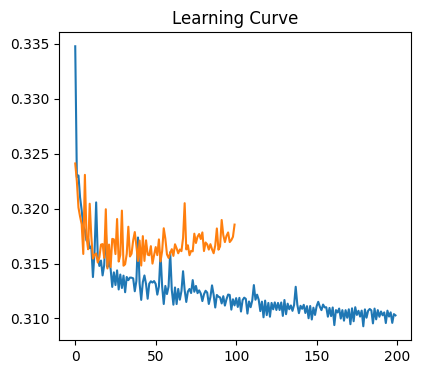

In [ ]:
import matplotlib.pyplot as plt

# Define the hyperparameters
input_size = X_train_tensor.shape[1]
hidden_sizes = [64, 32] # hidden layer sizes for a deep network with 2 hidden layers
output_size = 2 # assuming binary classification (diabetes, non-diabetes)
activation_func = nn.ReLU # example of activation function for hidden layers

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, torch.tensor(y_test_tensor, dtype=torch.long))

# Create DataLoader objects
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the deep neural network model
model = DeepDiabetesClassifier(input_size, hidden_sizes, output_size, activation_func)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model and record loss and AUC scores for plotting
num_epochs = 100
train_loss = []
test_loss = []
train_auc = []
test_auc = []
for epoch in range(num_epochs):
    # Training phase
    running_loss = 0.0
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Record training loss
    train_loss.append(running_loss / len(train_loader))

    # Evaluation phase
    with torch.no_grad():
        model.eval()

        # Compute training AUC score
        train_outputs = model(X_train_tensor)
        train_probs = nn.functional.softmax(train_outputs, dim=1)[:, 1].numpy()
        train_auc.append(roc_auc_score(y_train, train_probs))

        # Compute training loss
        train_loss_temp = 0.0
        for X_batch, y_batch in train_loader:
            train_outputs = model(X_batch)
            train_loss_temp += criterion(train_outputs, y_batch).item()
        train_loss.append(train_loss_temp / len(train_loader))

        # Compute test AUC score
        test_outputs = model(X_test_tensor)
        test_probs = nn.functional.softmax(test_outputs, dim=1)[:, 1].numpy()
        test_auc.append(roc_auc_score(y_test, test_probs))

        # Compute test loss
        test_loss_temp = 0.0
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            test_loss_temp += criterion(test_outputs, y_batch).item()
        test_loss.append(test_loss_temp / len(test_loader))

    # Print the loss and AUC scores for monitoring
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Train AUC: {train_auc[-1]:.4f}, Test AUC: {test_auc[-1]:.4f}')

# Plot the learning curve and AUC scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.title('Learning Curve')
plt


# Part 4 - Feedforward neural network with one hidden layer to predict BMI from the rest of the dataset
This is a regression task. 

We will now demonstrate how to build a linear model and a neural network model for a regression task using PyTorch.

In [ ]:
pip install matplotlib

In [ ]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from plot_lib import plot_data, plot_model, set_default


In [ ]:
Y = df['BMI']
X = df.drop(columns=['BMI']) 

bmi_range = df['BMI'].describe()[['min', 'max']]
print(bmi_range)

# Define a list of random seeds to try
seeds = [0, 10, 42, 144]

# Define a list of test set sizes to try
test_sizes = [0.1, 0.2, 0.3]

# Loop over the random seeds and test set sizes
for seed in seeds:
    for test_size in test_sizes:

      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

      # Define the hyperparameters
      input_size = X_train.shape[1]
      hidden_size = 64 # example of hidden layer size for a one-layer network
      output_size = 1 # predicting a continuous value (BMI)
      
      # Convert the data to PyTorch tensors
      X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
      y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
      X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
      y_test = y_test.values

min    12.0
max    98.0
Name: BMI, dtype: float64


### Using activation function ReLU

In [ ]:
activation_func = nn.ReLU() # example of activation function for hidden layer

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, torch.tensor(y_test, dtype=torch.float32))

# Create DataLoader objects
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the feedforward neural network model using Sequential
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    activation_func,
    nn.Linear(hidden_size, output_size)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for monitoring
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    rmse = mean_squared_error(y_test, outputs.numpy(), squared=False)
    print(f'RMSE: {rmse:.4f}')

Epoch [10/100], Loss: 34.5931
Epoch [20/100], Loss: 27.4978
Epoch [30/100], Loss: 58.3390
Epoch [40/100], Loss: 51.5117
Epoch [50/100], Loss: 36.7714
Epoch [60/100], Loss: 29.0795
Epoch [70/100], Loss: 50.7100
Epoch [80/100], Loss: 82.8434
Epoch [90/100], Loss: 27.2160
Epoch [100/100], Loss: 38.0294
RMSE: 6.5798


Epoch [10/100], Loss: 33.4013, Train RMSE: 6.6003, Test RMSE: 6.5781
Epoch [20/100], Loss: 40.6229, Train RMSE: 6.6281, Test RMSE: 6.6127
Epoch [30/100], Loss: 44.9228, Train RMSE: 6.6093, Test RMSE: 6.5911
Epoch [40/100], Loss: 20.5811, Train RMSE: 6.6065, Test RMSE: 6.5844
Epoch [50/100], Loss: 56.0285, Train RMSE: 6.6064, Test RMSE: 6.5883
Epoch [60/100], Loss: 35.8691, Train RMSE: 6.6069, Test RMSE: 6.5904
Epoch [70/100], Loss: 52.9612, Train RMSE: 6.5937, Test RMSE: 6.5742
Epoch [80/100], Loss: 30.9307, Train RMSE: 6.6320, Test RMSE: 6.6179
Epoch [90/100], Loss: 48.6775, Train RMSE: 6.6038, Test RMSE: 6.5849
Epoch [100/100], Loss: 42.6932, Train RMSE: 6.5951, Test RMSE: 6.5746


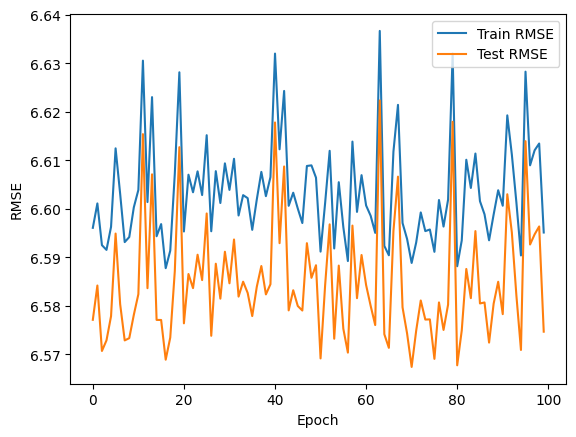

In [ ]:
# FOR PLOTTING the RSME plot for each epoch 

import matplotlib.pyplot as plt

train_losses = []
test_losses = []

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on the train set
    model.eval()
    train_outputs = model(X_train_tensor)
    train_rmse = mean_squared_error(y_train, train_outputs.detach().numpy(), squared=False)
    train_losses.append(train_rmse)

    # Evaluate the model on the test set
    test_outputs = model(X_test_tensor)
    test_rmse = mean_squared_error(y_test, test_outputs.detach().numpy(), squared=False)
    test_losses.append(test_rmse)

    # Print the loss for monitoring
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}')

# Plot the RMSE values
plt.plot(train_losses, label='Train RMSE')
plt.plot(test_losses, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


### Using activation function Sigmoid

In [ ]:
activation_func = nn.Sigmoid() # example of activation function for hidden layer


# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, torch.tensor(y_test, dtype=torch.float32))

# Create DataLoader objects
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the feedforward neural network model using Sequential
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    activation_func,
    nn.Linear(hidden_size, output_size)
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for monitoring
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    rmse = mean_squared_error(y_test, outputs.numpy(), squared=False)
    print(f'RMSE: {rmse:.4f}')

Epoch [10/100], Loss: 33.5834
Epoch [20/100], Loss: 38.6728
Epoch [30/100], Loss: 73.9260
Epoch [40/100], Loss: 38.9145
Epoch [50/100], Loss: 69.2406
Epoch [60/100], Loss: 38.8269
Epoch [70/100], Loss: 48.6965
Epoch [80/100], Loss: 33.3323
Epoch [90/100], Loss: 31.5910
Epoch [100/100], Loss: 33.2872
RMSE: 6.5835


# Part 5 - neural network of your choice to predict BMI from the rest of your dataset

In [ ]:
# Define the neural network model
class BMIRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BMIRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Set up the neural network and training parameters
model = BMIRegressor(input_size=X_train_tensor.shape[1], hidden_size=64, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, torch.Tensor(y_train_tensor).unsqueeze(1))
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the neural network on the test set
with torch.no_grad():
    test_outputs = model(torch.Tensor(X_test_tensor))
    test_rmse = torch.sqrt(criterion(test_outputs, torch.Tensor(y_test).unsqueeze(1)))
    print('Test RMSE: {:.4f}'.format(test_rmse.item())) 


#     # Convert the data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test = y_test.values

Epoch [100/1000], Loss: 100.6779
Epoch [200/1000], Loss: 58.7976
Epoch [300/1000], Loss: 55.6264
Epoch [400/1000], Loss: 51.5058
Epoch [500/1000], Loss: 48.2113
Epoch [600/1000], Loss: 46.3644
Epoch [700/1000], Loss: 45.5088
Epoch [800/1000], Loss: 45.0479
Epoch [900/1000], Loss: 44.7004
Epoch [1000/1000], Loss: 44.3596
Test RMSE: 6.6495


# Extra Credit 

### A) Are there any predictors/features that have effectively no impact on the accuracy of these models? If so, please list them and comment briefly on your findings 

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target > 140

# Set up the Perceptron and feature selection
perceptron = Perceptron(max_iter=1000, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rfecv = RFECV(estimator=perceptron, cv=cv, scoring='accuracy')

# Fit the Perceptron with feature selection
rfecv.fit(X, y)

# Print the ranking of each feature
for i in range(X.shape[1]):
    print(f"Feature {i}: {rfecv.ranking_[i]}")


Feature 0: 4
Feature 1: 1
Feature 2: 1
Feature 3: 1
Feature 4: 3
Feature 5: 1
Feature 6: 1
Feature 7: 2
Feature 8: 1
Feature 9: 1
